In [1]:
# LIBRARIES

import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
import requests
import re                            
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline
plt.rcParams['font.size'] = 12

In [2]:
pd.set_option('display.max_rows', 100)          
pd.set_option('display.max_columns', 100)      
pd.set_option('display.width', None)             
pd.set_option('display.max_colwidth', 300)       
pd.set_option("display.precision", 6)
pd.set_option('display.pprint_nest_depth', 10)

# Making a request to the website

In [3]:
# CHECKING IF WEBSITE ALLOWS SCRAPING:

import os
#print(os.popen("curl https://www.tennismagazin.de/tennis-weltrangliste-herren/robots.txt").read())

In [4]:
try:
    url = "https://www.tennismagazin.de/tennis-weltrangliste-herren/"
    response = requests.get(url)
    print("The response that we got back from the URL is", response.status_code)
    
except ValueError:
    print("The response that we got back from the URL is", response.status_code)

The response that we got back from the URL is 200


# Parsing Html

In [5]:
soup = BeautifulSoup(response.text, "html.parser")
html = soup.find_all("div")

In [6]:
soup.title.text

'ATP Tennis Weltrangliste der Herren - tennis MAGAZIN'

In [7]:
soup.p.text

'Die Tennis Weltrangliste der Herren zeigt die aktuell besten Tennisspieler der Welt und wird von der ATP (Association of Tennis Professionals) herausgegeben. Sie wird seit 1973 im Wochen- bzw. während der Grand Slam-Turniere im zwei-Wochen-Rhythmus aktualisiert und ist das Pendant zu der WTA-Rangliste der Damen (Women’s Tennis Association).'

In [8]:
# FIND THE TABLE:

# getting the table head:
html_thead = soup.find_all("thead")[0]

# getting all the rows (cells) in table head:
html_tr = html_thead.find_all("tr")

# creating a list of the column names:
for i in html_tr:
    # get the table headings
    th = (i.find_all("th"))
    # single values for the list of column names
    headings = [j.text for j in th]

In [9]:
headings

['Rang', 'Veränderung', 'Name', 'Alter', 'Punkte', 'Turniere']

In [10]:
# FIND THE BODY:

# getting the table body:
tbody = soup.table
html_text = tbody.contents

# getting all the rows (cells) in table body:
content = []
# loop through table body
for i in html_text:
    th = i.find_all(["th", "td"])
    row = [j.text.strip() for j in th]
    # removing any spaces
    row = [j.replace(".", "") for j in row]
    content.append(row)

In [11]:
content[:10]

[['Rang', 'Veränderung', 'Name', 'Alter', 'Punkte', 'Turniere'],
 ['1', '', 'Novak Djokovic', '36', '11055', '19'],
 ['2', '', 'Carlos Alcaraz', '20', '8855', '18'],
 ['3', '', 'Daniil Medvedev', '27', '7555', '21'],
 ['4', '', 'Jannik Sinner', '22', '6490', '22'],
 ['5', '', 'Andrey Rublev', '26', '5010', '25'],
 ['6', '+1', 'Alexander Zverev', '26', '4275', '27'],
 ['7', '-1', 'Stefanos Tsitsipas', '25', '4025', '24'],
 ['8', '', 'Holger Rune', '20', '3815', '23'],
 ['9', '', 'Hubert Hurkacz', '26', '3320', '24']]

# Data Frame

In [12]:
df_tennis_man = pd.DataFrame(content[1:], columns=headings)

df_tennis_man.head(6)

,Rang,Veränderung,Name,Alter,Punkte,Turniere
0,1,,Novak Djokovic,36,11055,19
1,2,,Carlos Alcaraz,20,8855,18
2,3,,Daniil Medvedev,27,7555,21
3,4,,Jannik Sinner,22,6490,22
4,5,,Andrey Rublev,26,5010,25
5,6,+1,Alexander Zverev,26,4275,27


In [13]:
df_tennis_man.shape

(100, 6)

In [14]:
# Filling empty places "Veränderung" with 0:

def change(x):
    if x == "":
        return 0
    else:
        return x
    
df_tennis_man["Veränderung"] = df_tennis_man["Veränderung"].apply(change)   

In [15]:
# Categorical data to numeric

df_tennis_man.Rang = df_tennis_man.Rang.astype(int)
df_tennis_man.Veränderung = df_tennis_man.Veränderung.astype(int)
df_tennis_man.Alter = df_tennis_man.Alter.astype(int)
df_tennis_man.Punkte = df_tennis_man.Punkte.astype(int)
df_tennis_man.Turniere = df_tennis_man.Turniere.astype(int)

In [16]:
df_tennis_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rang         100 non-null    int32 
 1   Veränderung  100 non-null    int32 
 2   Name         100 non-null    object
 3   Alter        100 non-null    int32 
 4   Punkte       100 non-null    int32 
 5   Turniere     100 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 2.9+ KB


In [17]:
# Changing column names:

df_tennis_man = df_tennis_man.rename(columns = {"Rang":"rank", "Veränderung":"ranking_change", "Name":"player", 
                                                   "Alter":"age", "Punkte":"points", "Turniere":"tourn_played"})

In [18]:
df_tennis_man.head(5)

,rank,ranking_change,player,age,points,tourn_played
0,1,0,Novak Djokovic,36,11055,19
1,2,0,Carlos Alcaraz,20,8855,18
2,3,0,Daniil Medvedev,27,7555,21
3,4,0,Jannik Sinner,22,6490,22
4,5,0,Andrey Rublev,26,5010,25


In [19]:
# EXPORTING DATAFRAME TO CSV:

#df_tennis_man.to_csv("tennis_man.csv",index=False)

# VISUALIZATIONS

Text(0.5, 1.0, 'AGE GESAMT')

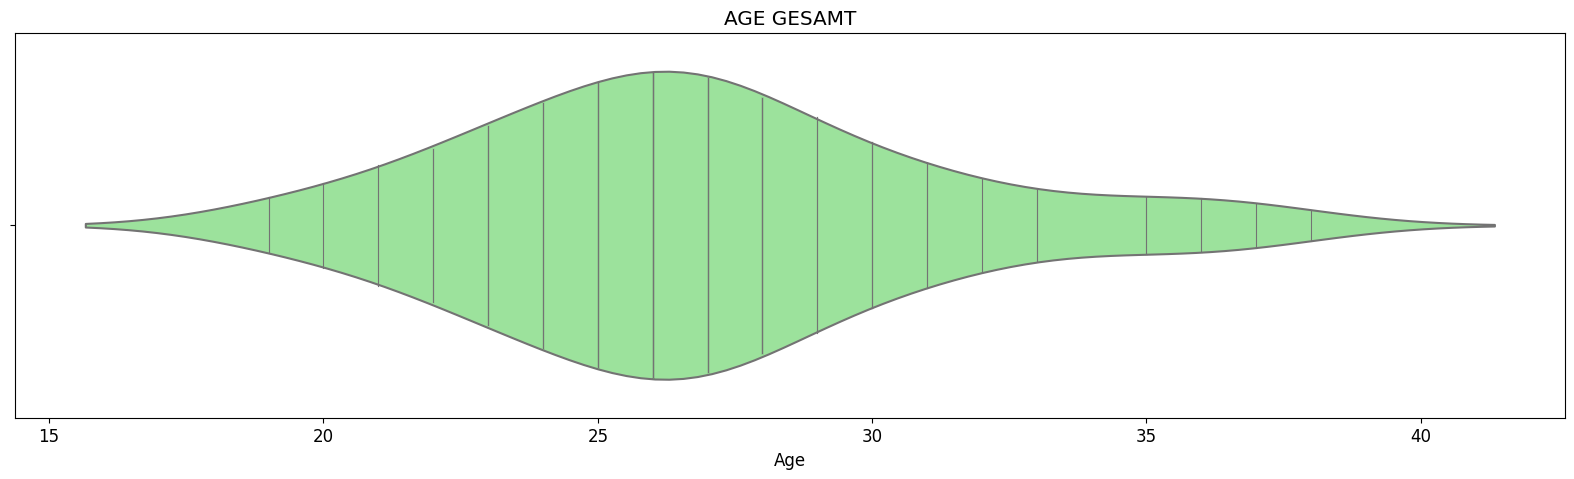

In [20]:
plt.figure(figsize=(20,5))

sns.violinplot(x=df_tennis_man["age"],inner="stick", color = "lightgreen")
plt.xlabel("Age")
plt.title("AGE GESAMT")

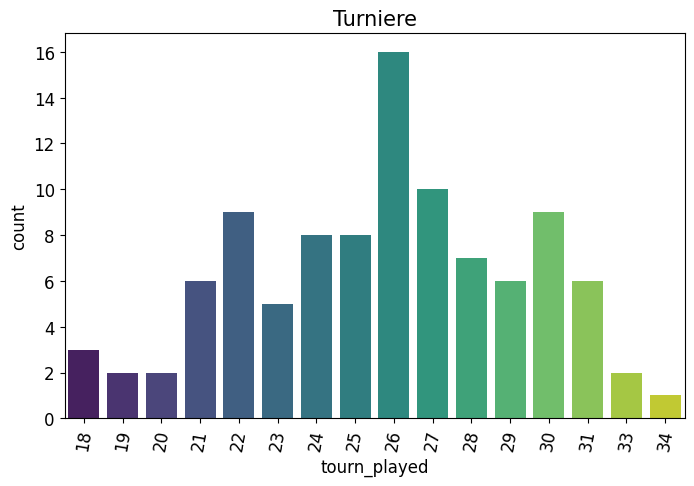

In [21]:
plt.figure(figsize=(8,5))

sns.countplot(x=df_tennis_man["tourn_played"], palette="viridis")
plt.title("Turniere", fontsize=15)
plt.xticks(rotation=80)
plt.show()

In [22]:
df_tennis_man.head(100)

,rank,ranking_change,player,age,points,tourn_played
0,1,0,Novak Djokovic,36,11055,19
1,2,0,Carlos Alcaraz,20,8855,18
2,3,0,Daniil Medvedev,27,7555,21
3,4,0,Jannik Sinner,22,6490,22
4,5,0,Andrey Rublev,26,5010,25
5,6,1,Alexander Zverev,26,4275,27
6,7,-1,Stefanos Tsitsipas,25,4025,24
7,8,0,Holger Rune,20,3815,23
8,9,0,Hubert Hurkacz,26,3320,24
9,10,2,Alex de Minaur,24,2950,25
